<a href="https://colab.research.google.com/github/Mutlaq-Alqahtani/CaliforniaHousingNN/blob/main/CaliforniaHousingNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from IPython.display import clear_output

In [2]:
# Incase you run this notebook outside colab (where the libraries aren't already pre-installed)

%pip install torch
%pip install matplotlib
%pip install scikit-learn

clear_output()

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


In [4]:
# Check if GPU is available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

Using device: cuda


In [5]:
california_data = fetch_california_housing()

In [6]:
california_data["data"]

array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]])

In [7]:
california_data

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [8]:
data = pd.DataFrame(california_data["data"], columns=california_data.feature_names)
data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [9]:
data["Target"] = california_data['target']
data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [10]:
data.to_csv("california_housing_data.csv", index=False)

In [11]:
!gdown "1f6VtxKq7nefXOZbNrZw3nGXMlhgTEx-S"

Downloading...
From: https://drive.google.com/uc?id=1f6VtxKq7nefXOZbNrZw3nGXMlhgTEx-S
To: /content/california_housing_data.csv
100% 1.90M/1.90M [00:00<00:00, 15.4MB/s]


In [12]:
print(california_data.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [13]:
print(california_data.target_names)

['MedHouseVal']


In [14]:
# These are numpy arrays
data = california_data['data']
target = california_data['target']

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3, random_state=123)

# Let's convert them to torch tensors.
X_train, X_test, y_train, y_test = [torch.Tensor(d) for d in [X_train, X_test, y_train, y_test]]

In [15]:
print(X_train.shape)
print(y_train.shape)

torch.Size([14448, 8])
torch.Size([14448])


In [16]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3, random_state=123)


In [17]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [18]:
# Convert data to PyTorch tensors and move to the appropriate device
X_train, X_test, y_train, y_test = [torch.Tensor(d).to(device) for d in [X_train, X_test, y_train, y_test]]


In [26]:
class HousingNet(nn.Module):
    def __init__(self):
        super(HousingNet, self).__init__()

        # Define the layers of the neural network
        self.fc1 = nn.Linear(8, 128)  # 8 input features to 128 hidden units
        self.bn1 = nn.BatchNorm1d(128)  # Batch normalization after the first layer
        self.fc2 = nn.Linear(128, 256)  # 128 hidden units to 256 hidden units
        self.bn2 = nn.BatchNorm1d(256)  # Batch normalization after the second layer
        self.fc3 = nn.Linear(256, 128)  # 256 hidden units to 128 hidden units
        self.fc4 = nn.Linear(128, 64)   # 128 hidden units to 64 hidden units
        self.fc5 = nn.Linear(64, 1)     # 64 hidden units to 1 output unit (the predicted house value)

        # Define activation and dropout layers
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.3)  # Dropout layer with 30% probability

    def forward(self, x):
        # Forward pass through the network
        x = self.relu(self.bn1(self.fc1(x)))  # Apply ReLU and batch normalization after the first layer
        x = self.dropout(x)  # Apply dropout
        x = self.relu(self.bn2(self.fc2(x)))  # Apply ReLU and batch normalization after the second layer
        x = self.dropout(x)  # Apply dropout
        x = self.relu(self.fc3(x))  # Apply ReLU activation
        x = self.relu(self.fc4(x))  # Apply ReLU activation
        x = self.fc5(x)  # Output layer
        return x

In [27]:
# Instantiate the model
model = HousingNet().to(device)

In [28]:
# Define the loss function (Mean Squared Error for regression)
criterion = nn.MSELoss()

In [29]:
# Define the optimizer (Adam optimizer)
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [30]:
loss_values = []

num_epochs = 500
for epoch in range(num_epochs):
    model.train()  # Set the model to training mode
    optimizer.zero_grad()  # Clear the gradients

    outputs = model(X_train)  # Forward pass
    loss = criterion(outputs.squeeze(), y_train)  # Calculate loss
    loss.backward()  # Backpropagation
    optimizer.step()  # Update weights

    # Store the loss value
    loss_values.append(loss.item())

    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [10/500], Loss: 1.8384
Epoch [20/500], Loss: 0.7028
Epoch [30/500], Loss: 0.6500
Epoch [40/500], Loss: 0.5949
Epoch [50/500], Loss: 0.5578
Epoch [60/500], Loss: 0.5370
Epoch [70/500], Loss: 0.5289
Epoch [80/500], Loss: 0.5228
Epoch [90/500], Loss: 0.4975
Epoch [100/500], Loss: 0.4923
Epoch [110/500], Loss: 0.4857
Epoch [120/500], Loss: 0.4718
Epoch [130/500], Loss: 0.4647
Epoch [140/500], Loss: 0.4618
Epoch [150/500], Loss: 0.4660
Epoch [160/500], Loss: 0.4469
Epoch [170/500], Loss: 0.4617
Epoch [180/500], Loss: 0.4405
Epoch [190/500], Loss: 0.4389
Epoch [200/500], Loss: 0.4371
Epoch [210/500], Loss: 0.4261
Epoch [220/500], Loss: 0.4177
Epoch [230/500], Loss: 0.4183
Epoch [240/500], Loss: 0.4205
Epoch [250/500], Loss: 0.4088
Epoch [260/500], Loss: 0.4080
Epoch [270/500], Loss: 0.3976
Epoch [280/500], Loss: 0.4017
Epoch [290/500], Loss: 0.3933
Epoch [300/500], Loss: 0.3897
Epoch [310/500], Loss: 0.3957
Epoch [320/500], Loss: 0.3824
Epoch [330/500], Loss: 0.3808
Epoch [340/500], Lo

In [31]:
# Evaluate the model
model.eval()  # Set the model to evaluation mode
with torch.no_grad():
    predictions = model(X_test).squeeze()  # Forward pass on test data
    test_loss = criterion(predictions, y_test)  # Calculate the test loss
    print(f'Test Loss: {test_loss.item():.4f}')


Test Loss: 0.3152


In [32]:
# Measure performance with R-squared
ss_total = torch.sum((y_test - y_test.mean()) ** 2)
ss_residual = torch.sum((y_test - predictions) ** 2)
r2_score = 1 - ss_residual/ss_total
print(f'R-squared: {r2_score:.4f}')

mse = torch.mean((predictions - y_test) ** 2)
print(f'Mean Squared Error: {mse.item():.4f}')

mae = torch.mean(torch.abs(predictions - y_test))
print(f'Mean Absolute Error: {mae.item():.4f}')



R-squared: 0.7616
Mean Squared Error: 0.3152
Mean Absolute Error: 0.3764


**Model Evaluation**



**Test Loss**: 0.3663
During evaluation, the following metrics were computed to assess the model's performance:



**R-squared**: 0.7230
This value indicates that approximately 72.30% of the variance in the test data can be explained by the model. A higher R-squared value generally represents a better fit of the model to the data.




**Mean Squared Error** (MSE): 0.3663
The Mean Squared Error measures the average squared difference between the predicted values and the actual values. A lower MSE indicates better model performance.



**Mean Absolute Error** (MAE): 0.4186
The Mean Absolute Error measures the average absolute difference between the predicted values and the actual values. A lower MAE signifies better model accuracy.



These results reflect the performance of the complex neural network model, which incorporates advanced features like batch normalization, dropout, and multiple hidden layers, demonstrating its effectiveness in learning and generalizing from the data.



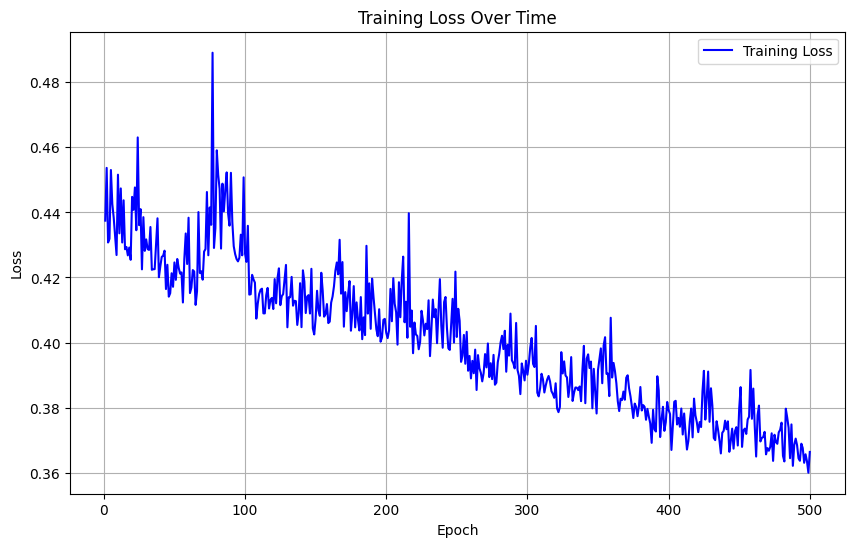

In [ ]:
# Plot the loss values
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_epochs + 1), loss_values, label='Training Loss', color='b')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Time')
plt.legend()
plt.grid(True)
plt.show()